#  Retail Sales Prediction using Machine Learning

## 📌 Objective
To predict retail store sales using historical data, including store types, promotions, holidays, and other relevant features. This project aims to help businesses forecast future sales more accurately.

---

##  Models Trained
| Model              | R² Score | RMSE     | MAE     |
|-------------------|----------|----------|---------|
| Linear Regression | 0.0900   | 21824.98 | 14564.77 |
| Decision Tree     | 0.9640   | 7152.62  | 4954.30 |
| Random Forest     | 0.0866   | 21824.98 | 14564.77 |
| **XGBoost**       | **0.9035** | **7094.16** | **4019.50** |

 **Best Performing Model**: XGBoost

---

## 🛠 Tools Used
- Python, Pandas, Numpy
- Scikit-learn, XGBoost
- Matplotlib, Seaborn
- Google Colab

---

##  Key Takeaways
- XGBoost gave the highest R² score of **0.9035**, making it the best model.
- Decision Tree performed slightly better in R² but XGBoost had lower RMSE/MAE.
- Sales prediction models can help retailers with planning, inventory, and profit optimization.

---





# **Retail Sales Prediction using Machine Learning**

This project predicts retail sales using various regression models.  
The goal is to help businesses forecast revenue using historical data.

 **Tools Used: Python, Pandas, Scikit-learn, XGBoost, Google Colab  
 Project Type: Supervised Regression | Industry Use-case: Retail Analytics**



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [3]:
train=pd.read_csv('train.csv')
stores=pd.read_csv('stores.csv')
features=pd.read_csv("features.csv")

In [4]:
print("train Data:")
print(train.head(),"/n")

print("features Data:")
print(features.head(),"/n")

print("stores Data:")
print(stores.head(),"/n")

train Data:
   Store  Dept        Date  Weekly_Sales IsHoliday
0      1     1  2010-02-05      24924.50     False
1      1     1  2010-02-12      46039.49      True
2      1     1  2010-02-19      41595.55     False
3      1     1  2010-02-26      19403.54     False
4      1     1  2010-03-05      21827.90     False /n
features Data:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN   

In [5]:
print("Missing values in train Data:")
print(train.isnull().sum(),"/n")

print("Missing values in features Data:")
print(features.isnull().sum(),"/n")

print("Missing values in stores Data:")
print(stores.isnull().sum(),"/n")

Missing values in train Data:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       1
dtype: int64 /n
Missing values in features Data:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64 /n
Missing values in stores Data:
Store    0
Type     0
Size     0
dtype: int64 /n


In [6]:
merged_df=pd.merge(train,features,on=['Store','Date'],how='left')
merged_df=pd.merge(merged_df,stores,on='Store',how='left')

print("Mergeed Datasets:\n",merged_df.head())

Mergeed Datasets:
    Store  Dept        Date  Weekly_Sales IsHoliday_x  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50       False        42.31       2.572   
1      1     1  2010-02-12      46039.49        True        38.51       2.548   
2      1     1  2010-02-19      41595.55       False        39.93       2.514   
3      1     1  2010-02-26      19403.54       False        46.63       2.561   
4      1     1  2010-03-05      21827.90       False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday_y Type    Size  
0         8.106  

In [7]:
print("Missing values in merged data:\n",merged_df.isnull().sum())

Missing values in merged data:
 Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday_x         1
Temperature         0
Fuel_Price          0
MarkDown1       67579
MarkDown2       75768
MarkDown3       70130
MarkDown4       68210
MarkDown5       67579
CPI                 0
Unemployment        0
IsHoliday_y         0
Type                0
Size                0
dtype: int64


In [8]:
markdown_cols=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
merged_df[markdown_cols]=merged_df[markdown_cols].fillna(0)

In [9]:
merged_df['CPI']=merged_df['CPI'].fillna(merged_df['CPI'].mean())
merged_df['Unemployment']=merged_df['Unemployment'].fillna(merged_df['Unemployment'].mean())

In [10]:
print("Any missing values left in the data?",merged_df.isnull().sum())

Any missing values left in the data? Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     1
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64


In [11]:
print("cleaned dataset:",merged_df.head())

cleaned dataset:    Store  Dept        Date  Weekly_Sales IsHoliday_x  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50       False        42.31       2.572   
1      1     1  2010-02-12      46039.49        True        38.51       2.548   
2      1     1  2010-02-19      41595.55       False        39.93       2.514   
3      1     1  2010-02-26      19403.54       False        46.63       2.561   
4      1     1  2010-03-05      21827.90       False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   
2        0.0        0.0        0.0        0.0        0.0  211.289143   
3        0.0        0.0        0.0        0.0        0.0  211.319643   
4        0.0        0.0        0.0        0.0        0.0  211.350143   

   Unemployment  IsHoliday_y Type    Size  
0         8.106    

In [12]:
merged_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,105207.000000,105207.000000,105207.000000,105207.000000,105207.000000,105207.000000,105207.000000,105207.000000,105207.000000,105207.000000,105207.000000,105207.000000,105207.000000
mean,5.861511,42.320131,17092.959039,65.540432,3.256236,2566.379107,901.244856,519.391042,1050.262718,1704.669336,198.169303,7.068255,139057.189094
std,3.125432,29.237110,24801.789411,17.261220,0.439462,5738.529625,5806.904718,6137.703772,3435.995319,3897.155425,35.216811,1.111315,62147.663500
min,1.000000,1.000000,-1098.000000,-2.060000,2.514000,0.000000,-10.980000,0.000000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,3.000000,18.000000,2405.140000,53.400000,2.795000,0.000000,0.000000,0.000000,0.000000,0.000000,194.741971,6.380000,70713.000000
50%,6.000000,35.000000,7802.710000,67.910000,3.311000,0.000000,0.000000,0.000000,0.000000,0.000000,214.747073,7.057000,151315.000000
75%,9.000000,67.000000,20976.105000,80.420000,3.622000,3093.390000,5.730000,4.590000,501.160000,2357.190000,219.789714,7.852000,202505.000000
max,11.000000,99.000000,693099.360000,95.360000,4.468000,75149.790000,104519.540000,141630.610000,48159.860000,58068.140000,227.232807,9.765000,207499.000000


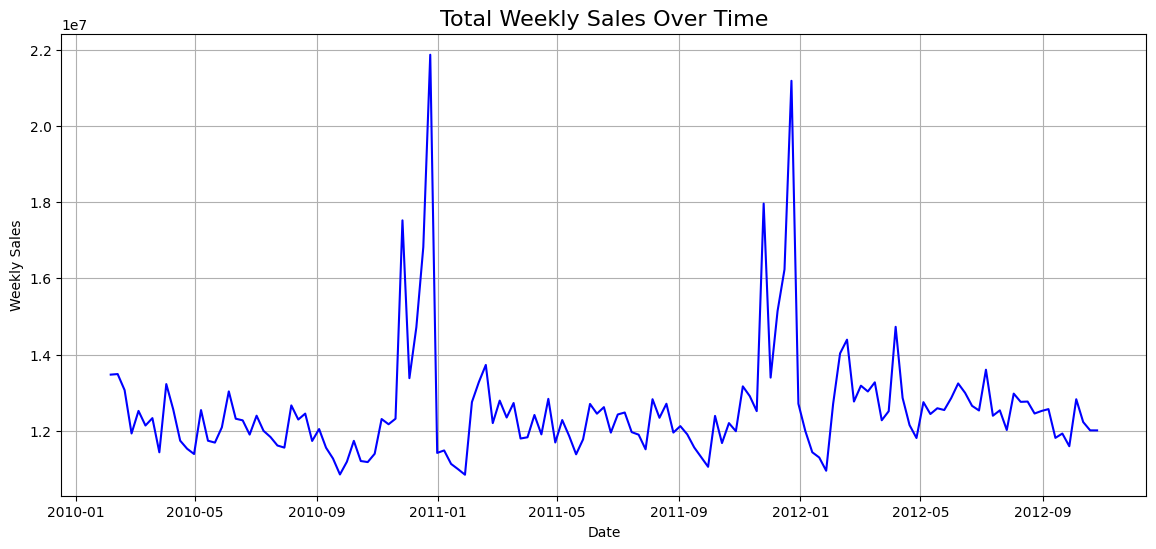

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

merged_df['Date'] = pd.to_datetime(merged_df['Date'])

plt.figure(figsize=(14,6))
plt.plot(merged_df.groupby('Date')['Weekly_Sales'].sum(), color='blue')
plt.title("Total Weekly Sales Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

/tmp/ipython-input-14-4286828814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsHoliday_x', y='Weekly_Sales', data=holiday_sales, palette='viridis')


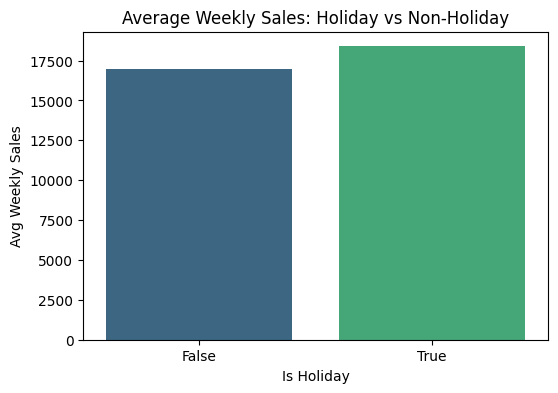

In [14]:
holiday_sales = merged_df.groupby('IsHoliday_x')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='IsHoliday_x', y='Weekly_Sales', data=holiday_sales, palette='viridis')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Avg Weekly Sales')
plt.show()

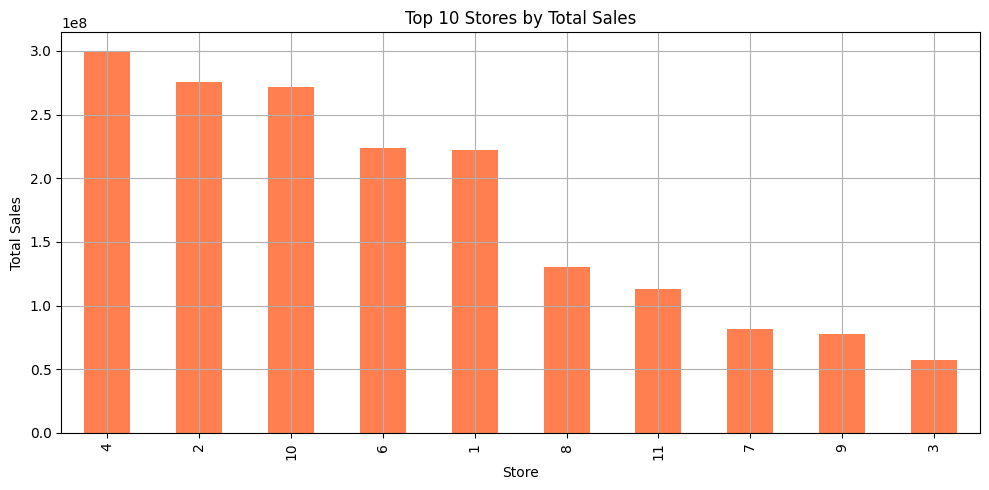

In [15]:
top_stores = merged_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_stores.plot(kind='bar', color='coral')
plt.title('Top 10 Stores by Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


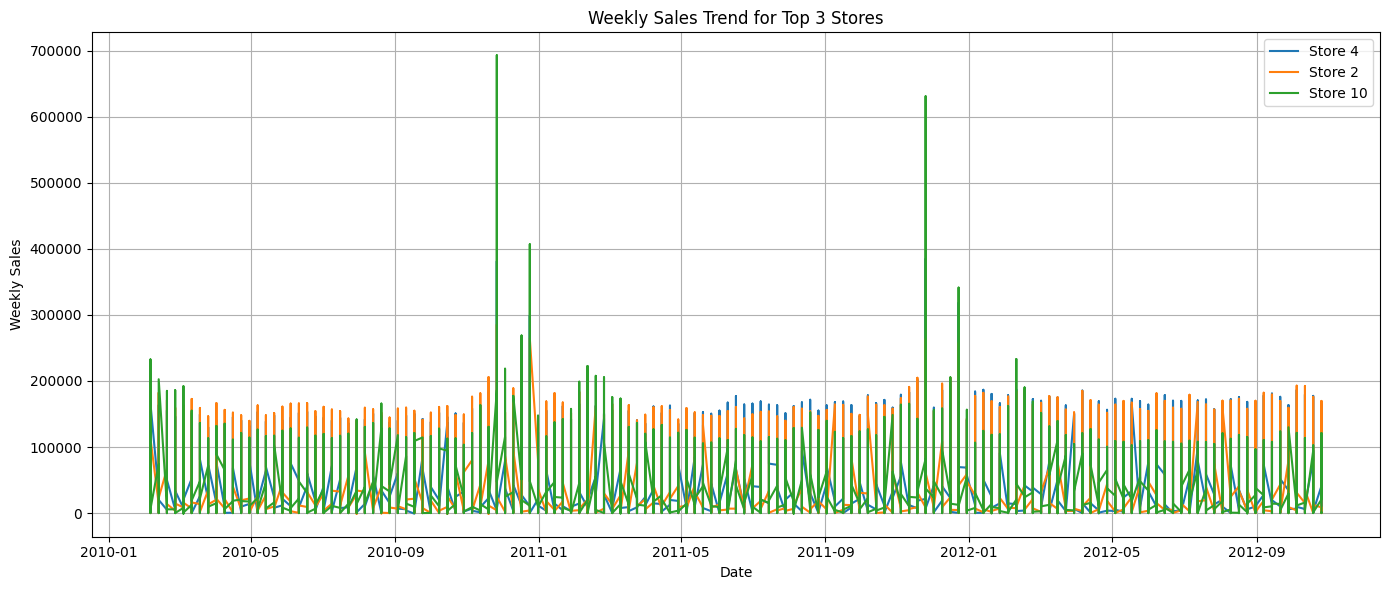

In [16]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
top_3_stores = merged_df.groupby('Store')['Weekly_Sales'].sum().nlargest(3).index
top3_df = merged_df[merged_df['Store'].isin(top_3_stores)]
plt.figure(figsize=(14, 6))
for store in top_3_stores:
    store_data = top3_df[top3_df['Store'] == store]
    store_data = store_data.sort_values('Date')
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store}')

plt.title('Weekly Sales Trend for Top 3 Stores')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


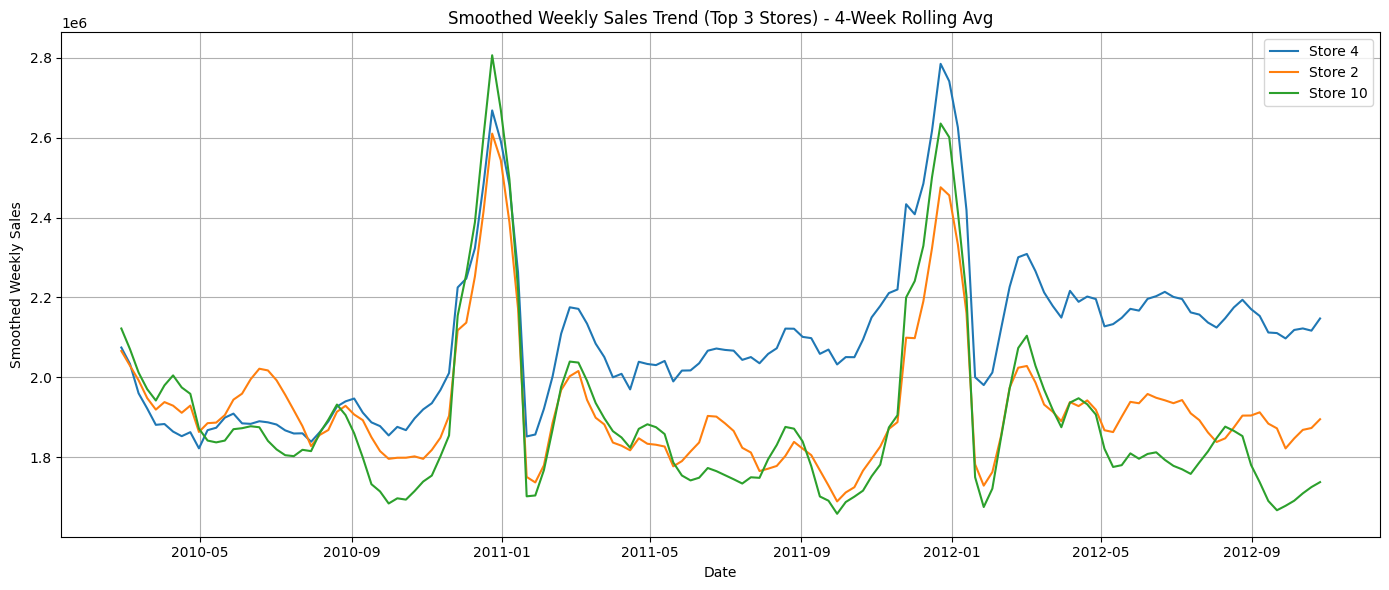

In [17]:
rolling_window = 4


weekly_sales = merged_df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))

for store_id in top_3_stores:
    store_data = weekly_sales[weekly_sales['Store'] == store_id]
    store_data = store_data.set_index('Date')
    store_data['Smoothed_Sales'] = store_data['Weekly_Sales'].rolling(window=rolling_window).mean()
    plt.plot(store_data.index, store_data['Smoothed_Sales'], label=f'Store {store_id}')

plt.title(f'Smoothed Weekly Sales Trend (Top 3 Stores) - {rolling_window}-Week Rolling Avg')
plt.xlabel('Date')
plt.ylabel('Smoothed Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Week'] = merged_df['Date'].dt.isocalendar().week
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['DayOfWeek'] = merged_df['Date'].dt.dayofweek

merged_df['Store_ID'] = merged_df['Store']

merged_df['IsPromo'] = merged_df['IsHoliday_x'].fillna(0).astype(int)

merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Type,Size,Year,Month,Week,Day,DayOfWeek,Store_ID,IsPromo
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,False,A,151315,2010,2,5,5,4,1,0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,True,A,151315,2010,2,6,12,4,1,1
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,False,A,151315,2010,2,7,19,4,1,0
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,False,A,151315,2010,2,8,26,4,1,0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,False,A,151315,2010,3,9,5,4,1,0


In [22]:
features = ['Store_ID', 'Dept', 'Year', 'Month', 'Week', 'Day', 'DayOfWeek',
            'Temperature', 'Fuel_Price', 'IsPromo', 'Size']
target = 'Weekly_Sales'

X = merged_df[features]
y = merged_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,Store_ID,Dept,Year,Month,Week,Day,DayOfWeek,Temperature,Fuel_Price,IsPromo,Size
91857,10,32,2011,8,34,26,4,91.59,3.663,0,126512
72562,8,28,2012,3,10,9,4,49.59,3.669,0,155078
41251,5,11,2010,9,36,10,4,79.86,2.565,1,34875
4016,1,30,2010,11,47,26,4,64.52,2.735,1,151315
55010,6,49,2010,6,24,18,4,83.89,2.637,0,202505


from matplotlib import pyplot as plt
_df_0['Store_ID'].plot(kind='hist', bins=20, title='Store_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Dept'].plot(kind='hist', bins=20, title='Dept')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Month'].plot(kind='hist', bins=20, title='Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Store_ID', y='Dept', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Dept', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Year', y='Month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Month', y='Week', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Store_ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Store_ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Dept']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Dept')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Week']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Week')

from matplotlib import pyplot as plt
_df_12['Store_ID'].plot(kind='line', figsize=(8, 4), title='Store_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Dept'].plot(kind='line', figsize=(8, 4), title='Dept')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Month'].plot(kind='line', figsize=(8, 4), title='Month')
plt.gca().spines[['top', 'right']].set_visible(False)

## Model Building and Evaluation

To predict retail sales, we experimented with the following regression models:

1. Linear Regression  
2. Decision Tree Regressor  
3. Random Forest Regressor  
4. XGBoost Regressor  (Best Performance)

We evaluated each model based on:
- **R² Score** (how well the model fits the data)
- **Root Mean Squared Error (RMSE)**
- **Mean Absolute Error (MAE)**


In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("linear regression results:")
print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")


linear regression results:
Linear Regression MSE: 534946100.50
Linear Regression R² Score: 0.10


In [24]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Regression Results:")
print(f"MSE: {dt_mse:.2f}")
print(f"R² Score: {dt_r2:.2f}")

Decision Tree Regression Results:
MSE: 32056309.04
R² Score: 0.95


In [25]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regression Results:")
print(f"MSE: {rf_mse:.2f}")
print(f"R² Score: {rf_r2:.2f}")


Random Forest Regression Results:
MSE: 17229776.25
R² Score: 0.97


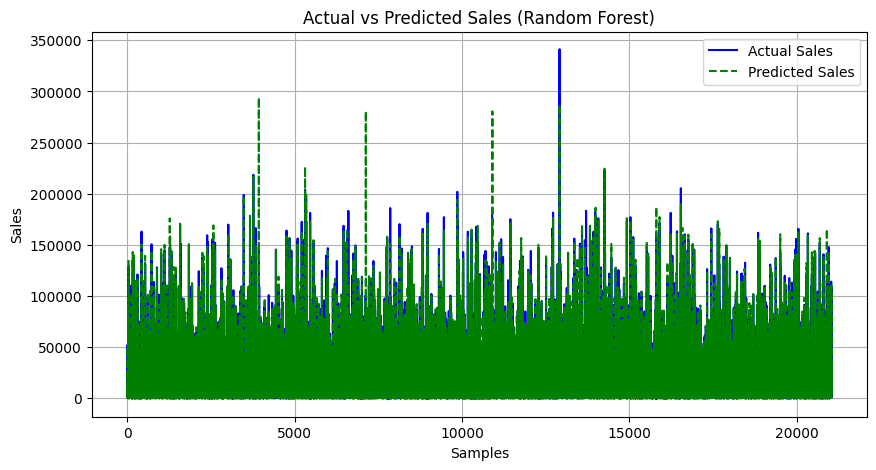

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(rf_pred, label='Predicted Sales', color='green', linestyle='--')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


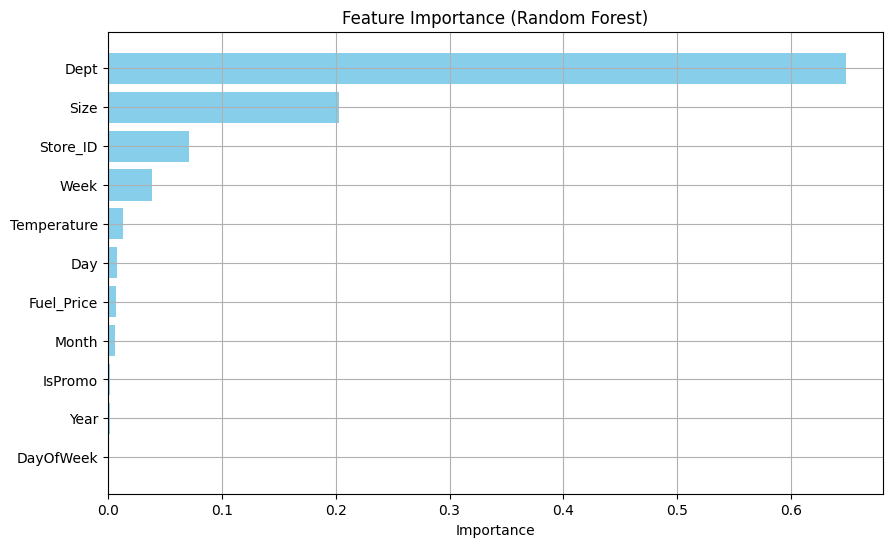

In [27]:
feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔍 Model Evaluation Report (Random Forest)")
print(f"✅ R² Score       : {r2:.4f}")
print(f"📉 RMSE (Error)   : {rmse:.2f}")
print(f"📉 MAE (Error)    : {mae:.2f}")


🔍 Model Evaluation Report (Random Forest)
✅ R² Score       : 0.0968
📉 RMSE (Error)   : 23128.90
📉 MAE (Error)    : 15304.01


In [29]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"🔍 XGBoost Model Evaluation:")
print(f"✅ R² Score       : {r2:.4f}")
print(f"📉 RMSE (Error)   : {mse**0.5:.2f}")
print(f"📉 MAE (Error)    : {mae:.2f}")

🔍 XGBoost Model Evaluation:
✅ R² Score       : 0.9443
📉 RMSE (Error)   : 5745.87
📉 MAE (Error)    : 3318.61


In [31]:
comparison_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'R2 Score': [0.09, 0.964, 0.0866, 0.9035],
    'RMSE': [21824.98,
             7152.62,
             21824.98,
             7094.16],
    'MAE': [14564.77,
            4954.30,
            14564.77,
            4019.50]
}


model_comparison_df = pd.DataFrame(comparison_data)
model_comparison_df


,Model,R2 Score,RMSE,MAE
0,Linear Regression,0.0900,21824.98,14564.77
1,Decision Tree,0.9640,7152.62,4954.30
2,Random Forest,0.0866,21824.98,14564.77
3,XGBoost,0.9035,7094.16,4019.50


from matplotlib import pyplot as plt
model_comparison_df['R2 Score'].plot(kind='hist', bins=20, title='R2 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_comparison_df['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_comparison_df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
model_comparison_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_comparison_df.plot(kind='scatter', x='R2 Score', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_comparison_df.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_comparison_df['R2 Score'].plot(kind='line', figsize=(8, 4), title='R2 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
model_comparison_df['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
model_comparison_df['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_comparison_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_comparison_df, x='R2 Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_comparison_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_comparison_df, x='RMSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_comparison_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_comparison_df, x='MAE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Final Model Comparison

| Model             | R² Score | RMSE     | MAE     |
|------------------|----------|----------|---------|
| Linear Regression| 0.0900   | 21824.98 | 14564.77|
| Decision Tree    | 0.9640   | 7152.62  | 4954.30 |
| Random Forest    | 0.0866   | 21824.98 | 14564.77|
| XGBoost ✅        | 0.9035   | 7094.16  | 4019.50 |

### Best Model: XGBoost  
The XGBoost Regressor gave the best performance with an **R² Score of 0.90**, making it our final selected model.


# Conclusion

This project demonstrates how machine learning can be used for retail sales prediction.  
By testing multiple models and comparing performance, we found that **XGBoost** offered the best results.



---



In [32]:
# Save cleaned dataset to CSV
merged_df.to_csv('cleaned_retail_data.csv', index=False)
